## 

서울시 구별 무더위쉼터 분포 분석
- 무더위쉼터의 고밀집 지역 및 저밀집 지역 알아보기 (강채운)
- 지역별 인구수 대비 무더위쉼터 수 비교 (유재훈)

사용에 여유로울 것으로 추정되는 쉼터들 알아보기 (유재훈)
- 이용가능 인원 대비 면적이 넓은 쉼터들
- 이용가능 인원 대비 선풍기를 많이 보유한 쉼터들
- 이용가능 인원 대비 에어컨을 많이 보유한 쉼터들

추가 기능을 제공하는 쉼터들을 지역구별로 알아보기. 구별로 지도에 색칠, 지도에 표시 (강채운)
- 야간개방하는 쉼터들
- 휴일개방하는 쉼터들
- 숙박가능한 쉼터들

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

#windows에서 한글폰트
# plt.rc('font', family='Malgun Gothic')

#mac에서 한글폰트
plt.rc('font', family='AppleGothic')

shelter_data = pd.read_csv('seoul_summer_shelter.csv')
area_data = pd.read_csv('area_by_gu.csv')['면적 (km²)']
# area_data

In [37]:
shelter_data['자치구'] = shelter_data['도로명주소'].apply(lambda x : x.split(" ")[1]) #'자치구' 열 추가
shelter_data.head(2)

,시설번호,년도,지역코드,시설유형,쉼터명칭,도로명주소,지번상세주소,면적,이용가능인원,선풍기보유대수,...,수정시간,사용여부,비고,운영시작일,운영종료일,경도,위도,X좌표,Y좌표,자치구
0,11200002,2024,1120052000,1,무학경로당,서울특별시 성동구 왕십리로31길 29,서울특별시 성동구 하왕십리동 990-7,98,24,4,...,10/16/23 17:24,Y,NaN,20230520.0,20230930.0,127.027357,37.561712,202417.0627,551353.7431,성동구
1,11200003,2024,1120052000,1,한신무학(아) 경로당,서울특별시 성동구 왕십리로31나길 22,서울특별시 성동구 하왕십리동 990,40,10,2,...,10/16/23 17:24,Y,NaN,20230520.0,20230930.0,127.028547,37.562203,202522.1857,551408.2363,성동구


[]

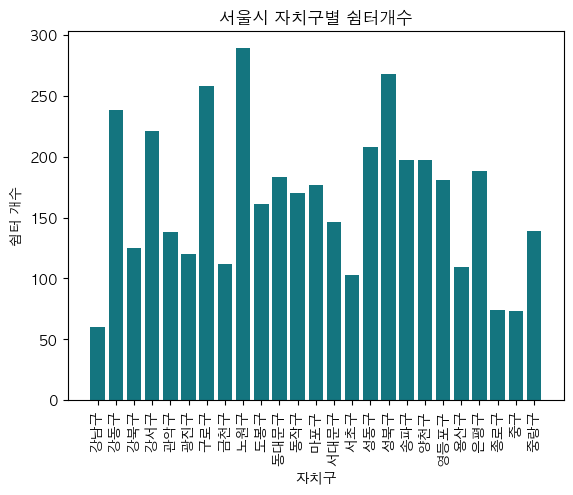

In [38]:
#1-1
#지역구별로 쉼터명칭의 개수를 세서 쉼터의 개수를 알아냄.
shelter_count_data = shelter_data.groupby('자치구')['쉼터명칭'].count().reset_index() #reset_index()로 groupby()된 데이터를 dataframe형태로 가공
shelter_count_data.columns = ['자치구', '쉼터개수']  # 컬럼 달기.

#막대그래프로 쉼터개수 비교하기
sns.barplot(data=shelter_count_data, x='자치구', y='쉼터개수', color='#028391')
plt.xticks(rotation=90) # 90도 회전
plt.xlabel('자치구')
plt.ylabel('쉼터 개수')
plt.title('서울시 자치구별 쉼터개수')
plt.plot()

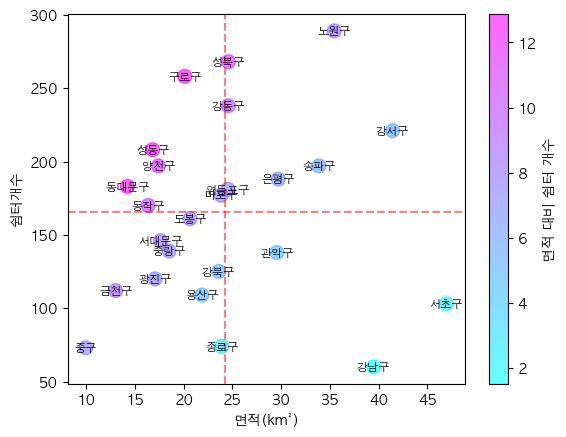

In [39]:
#1-1 - 산점도 그래프로 표현
#산점도 그래프. x축은 면적, y축은 쉼터개수로 함.
x = area_data
y = shelter_count_data['쉼터개수']

#크기는 고정, 색깔은 면적대비 쉼터 개수에 비례해서, 컬러맵은 'cool'로 설정. 투명도는 0.6
plt.scatter(x, y, s=100, c=y/x, cmap='cool', alpha=0.6)
plt.colorbar(label='면적 대비 쉼터 개수')

#각 원에 구 이름 달아주기. x위치 y위치에 맞는 이름 붙여줌.
for i in range(shelter_count_data.shape[0]):
    plt.text(x[i], y[i], shelter_count_data['자치구'][i], ha='center', va='center', fontsize=8)

#x축, y축 평균값으로 각각 점선을 그음. (AxisVerticalLine, AxisHorizontalLine)
plt.axvline(x = np.mean(x), color = 'r', linestyle = '--', alpha = 0.5)
plt.axhline(y = np.mean(y), color = 'r', linestyle = '--', alpha = 0.5)

plt.xlabel('면적(km²)')
plt.ylabel('쉼터개수')
plt.show()

In [87]:
#지도에 모든 쉼터들 표시해보기
# 서울의 중앙 좌표 (대략적인 중심 위치)
seoul_center = [37.5665, 126.9780]

map_seoul = folium.Map(seoul_center, zoom_start=12, zoom_control=False)

mc = MarkerCluster().add_to(map_seoul)

for _, shelter in shelter_data.iterrows():
    folium.Marker(
        location=[shelter['위도'], shelter['경도']],
        popup=shelter['쉼터명칭'],
        tooltip=shelter['쉼터명칭'],
    ).add_to(mc)

map_seoul

[]

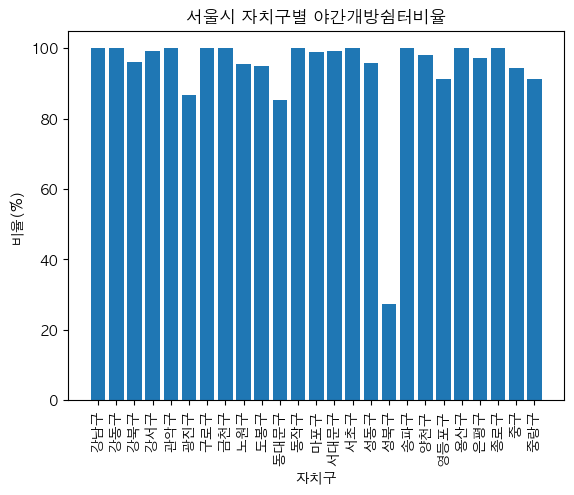

In [85]:
#3-1.야간개방하는 쉼터들 알아보기 - 막대그래프
shelters_night_open = shelter_data[shelter_data['야간개방'] == 'Y'] #야간개방만 하는 곳들로 필터링
shelters_night_open_count = shelters_night_open.groupby('자치구')['쉼터명칭'].count().reset_index() #자치구별로 야간개방쉼터개수 세기

night_merged = pd.merge(shelter_count_data, shelters_night_open_count) # 개수와 야간개방개수 병합
night_merged.columns = ['자치구', '쉼터개수', '야간개방쉼터개수'] # 컬럼 이름 새로 지어주기
night_merged['비율(%)'] = [(night_merged['야간개방쉼터개수'][i] / night_merged['쉼터개수'][i]) * 100 for i in range(len(night_merged))] # 비율컬럼 추가
night_merged

plt.bar(night_merged['자치구'], night_merged['비율(%)'])
plt.xticks(rotation=90)
plt.title('서울시 자치구별 야간개방쉼터비율')
plt.xlabel('자치구')
plt.ylabel('비율(%)')
plt.plot()

In [77]:
#지도에 야간개방쉼터 표시해보기

# 서울의 중앙 좌표 (대략적인 중심 위치)
seoul_center = [37.5665, 126.9780]

# folium 맵 객체 생성
map_seoul_shelter_night_open = folium.Map(location=seoul_center, zoom_start=12)

#마커클러스터 생성(마커들을 간소화시켜줌)
mc = MarkerCluster().add_to(map_seoul_shelter_night_open)

# 각 쉼터별로 마킹. dataframe의 각 행별로 읽기위해 iterrows() 사용.
for _, shelter in shelters_night_open.iterrows():
    folium.Marker(
        location=[shelter['위도'], shelter['경도']], #위도와 경로를 이용해서 마킹
        popup = shelter['쉼터명칭'], #마커 클릭시 정보가 나오게 함
        tooltip=shelter['쉼터명칭'], #마커 위에 커서를 올리면 정보가 나오게 함
        icon=folium.Icon(color='darkpurple', icon='moon', prefix='fa')
    ).add_to(mc) #마커를 마커클러스터에 추가

# map_seoul_shelter_night_open


In [76]:
#지도에 구별로 찍어보기
#자치구별 평군 위도 구하기(쉼터들 기반)
average_lat_lng = shelters_night_open.groupby('자치구')[['위도', '경도']].mean().reset_index()
average_lat_lng.columns = ['자치구', '위도', '경도']

map_seoul_shelter_night_open_by_gu = folium.Map(location=seoul_center, zoom_start=12)

for idx, shelter in shelters_night_open_count.iterrows():
    folium.Marker(
        location=[average_lat_lng['위도'][idx], average_lat_lng['경도'][idx]], #평균 위도와 경도에 마킹
        popup= "{}: {}개".format(shelter['자치구'], shelter['쉼터명칭']), #마커 클릭 시 정보 나옴
        tooltip="{}: {}개".format(shelter['자치구'], shelter['쉼터명칭']), #마우스 올릴 시 정보 나옴
        icon=folium.Icon(color='darkpurple', icon='moon', prefix='fa')
    ).add_to(map_seoul_shelter_night_open_by_gu)

# map_seoul_shelter_night_open_by_gu

/var/folders/wm/l5ptvnmd1yqcp6fv4hzm_z300000gn/T/ipykernel_85636/3116754099.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(holiday_merged, x='자치구', y='비율(%)', palette='gnuplot') #막대그래프 그리기


[]

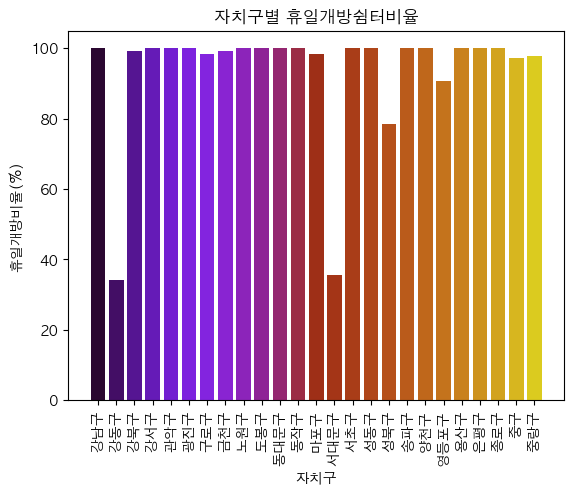

In [45]:
#3-2.휴일개방하는 쉼터들 알아내기
shelters_holiday_open = shelter_data[shelter_data['휴일개방'] == 'Y']

#자치구별로 휴일개방쉼터 세기
shelters_holiday_open_count = shelters_holiday_open.groupby('자치구')['쉼터명칭'].count().reset_index()

holiday_merged = pd.merge(shelter_count_data, shelters_holiday_open_count) #자치구별 개수와 자치구별 휴일개방쉼터개수 병합
holiday_merged.columns = ['자치구', '쉼터개수', '휴일개방쉼터개수'] #컬럼 이름 재정의
holiday_merged['비율(%)'] = [holiday_merged['휴일개방쉼터개수'][i] / holiday_merged['쉼터개수'][i] * 100 for i in range(len(holiday_merged))] #비율 구하기
holiday_merged

sns.barplot(holiday_merged, x='자치구', y='비율(%)', palette='gnuplot') #막대그래프 그리기
plt.title('자치구별 휴일개방쉼터비율')
plt.ylabel('휴일개방비율(%)')
plt.xlabel('자치구')
plt.xticks(rotation=90)
plt.plot()

In [70]:
#지도에 휴일개방 쉼터 표시하기
seoul_center = [37.5665, 126.9780]
#지도 객체 생성
map_seoul_shelter_holiday_open = folium.Map(location=seoul_center, zoom_start=12)

mc = MarkerCluster().add_to(map_seoul_shelter_holiday_open)

for _, shelter in shelters_holiday_open.iterrows(): #각 휴일개방 쉼터에 대해
    folium.Marker(
        location=[shelter['위도'], shelter['경도']], #위도경도정보로 위치 설정
        popup=shelter['쉼터명칭'], #클릭시 이름 나오게
        tooltip=shelter['쉼터명칭'], #커서 올릴 시 이름 나오게
        icon=folium.Icon(color='pink', icon='cake-candles', prefix='fa')
    ).add_to(mc) #마커를 지도에 추가

# map_seoul_shelter_holiday_open

In [80]:
# 지도에 구별로 찍어보기
# 자치구별 평군 위도 구하기(쉼터들 기반)
average_lat_lng = shelters_holiday_open.groupby('자치구')[['위도', '경도']].mean().reset_index()
average_lat_lng.columns = ['자치구', '위도', '경도']

map_seoul_shelter_holiday_open_by_gu = folium.Map(location=seoul_center, zoom_start=12)
mc = MarkerCluster().add_to(map_seoul_shelter_holiday_open_by_gu)

for idx, shelter in shelters_holiday_open_count.iterrows():
    folium.Marker(
        location=[average_lat_lng['위도'][idx],
                  average_lat_lng['경도'][idx]],  # 평균 위도와 경도에 마킹
        popup="{}: {}개".format(
            shelter['자치구'], shelter['쉼터명칭']),  # 마커 클릭 시 정보 나옴
        tooltip="{}: {}개".format(
            shelter['자치구'], shelter['쉼터명칭']),  # 마우스 올릴 시 정보 나옴
        # font-awesome(https://fontawesome.com/v4.7.0/icons/) 에서 아이콘 가져오기
        icon=folium.Icon(color='pink', icon='cake-candles', prefix='fa')
    ).add_to(mc)

map_seoul_shelter_holiday_open_by_gu

/var/folders/wm/l5ptvnmd1yqcp6fv4hzm_z300000gn/T/ipykernel_85636/1983445102.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stay_night_merged, x='자치구', y='비율(%)', palette='summer')


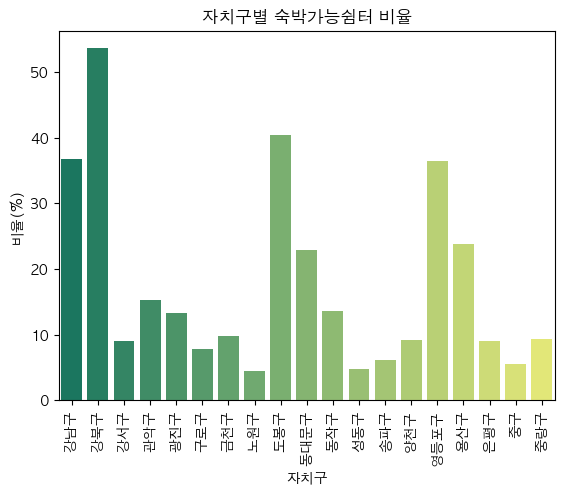

In [50]:
#3-3.숙박가능 쉼터 필터링
shelters_can_stay_night = shelter_data[shelter_data['숙박가능여부'] == 'Y']

shelters_can_stay_night_count = shelters_can_stay_night.groupby('자치구')['쉼터명칭'].count().reset_index() # 자치구별로 개수 세기

stay_night_merged = pd.merge(shelter_count_data, shelters_can_stay_night_count) #전체 개수와 숙박가능 개수 병합
stay_night_merged.columns = ['자치구', '쉼터개수', '숙박가능쉼터개수'] #컬럼 재정의
stay_night_merged['비율(%)'] = [ (stay_night_merged['숙박가능쉼터개수'][i] / stay_night_merged['쉼터개수'][i]) * 100 for i in range(len(stay_night_merged))]#비율
stay_night_merged

sns.barplot(data=stay_night_merged, x='자치구', y='비율(%)', palette='summer')
plt.title('자치구별 숙박가능쉼터 비율')
plt.xlabel('자치구')
plt.ylabel('비율(%)')
plt.xticks(rotation=90)
plt.show()

In [81]:
# 지도에 숙박가능 쉼터 표시하기
seoul_center = [37.5665, 126.9780]

# 지도 객체 생성
map_seoul_shelter_can_stay_night = folium.Map(location=seoul_center, zoom_start=12)
mc= MarkerCluster().add_to(map_seoul_shelter_can_stay_night)

for _, shelter in shelters_can_stay_night.iterrows(): #숙박가능한 각 쉼터에 대해 마커 생성
    folium.Marker(
        location=[shelter['위도'], shelter['경도']], #위도와 경도로 위치 설정
        popup=shelter['쉼터명칭'], #클릭시 이름 나옴
        tooltip=shelter['쉼터명칭'], #커서 올릴 시 이름 나옴
        icon=folium.Icon(color='gray', icon='home')
    ).add_to(mc) #지도 객체에 마커 추가

#아래 주석을 없애면 지도가 보입니다.
# map_seoul_shelter_can_stay_night 

In [84]:
#지도에 구별로 찍어보기

# 자치구별 평군 위도 구하기(쉼터들 기반)
average_lat_lng = shelters_can_stay_night.groupby('자치구')[['위도', '경도']].mean().reset_index()
average_lat_lng.columns = ['자치구', '위도', '경도']

map_seoul_shelter_can_stay_night_by_gu = folium.Map(location=seoul_center, zoom_start=12)
mc = MarkerCluster().add_to(map_seoul_shelter_can_stay_night_by_gu)

for idx, shelter in shelters_can_stay_night_count.iterrows():
    folium.Marker(
        location=[average_lat_lng['위도'][idx], average_lat_lng['경도'][idx]],  # 평균 위도와 경도에 마킹
        popup="{}: {}개".format(shelter['자치구'], shelter['쉼터명칭']),  # 마커 클릭 시 정보 나옴
        tooltip="{}: {}개".format(shelter['자치구'], shelter['쉼터명칭']),  # 마우스 올릴 시 정보 나옴
        icon=folium.Icon(color='gray', icon='home')
    ).add_to(mc)

# map_seoul_shelter_can_stay_night_by_gu